In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Research questions:
# 1. When are blue bikes used most often in Boston?
#     a. What times of day are they most often used?
#     b. What times of year are they most often used?
# 2. What are the most used stations for use?
# 3. What neighborhoods of Boston have the heaviest blue bike usage?
# 4. Are the heavy usage areas different for members/casual users?
# 5. What would be the best location for a new Blue Bike station in Boston?

# Import cleaned datasets
bluebikes23 = pd.read_csv("drive/MyDrive/BlueBikes2023.csv", low_memory=False)
bluebikes24 = pd.read_csv("drive/MyDrive/BlueBikes2024.csv", low_memory=False)

In [4]:
# Vertically concatenate data
bluebikes = pd.concat([bluebikes23, bluebikes24], ignore_index=True)

In [5]:
# Inspect header
bluebikes.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year,month,day,time,duration_min
0,NaN,classic_bike,2023-01-01 00:02:54.0800,2023-01-01 00:07:04.4100,Copley Square - Dartmouth St at Boylston St,36,Prudential Center - 101 Huntington Ave,21,42.349928,-71.077392,42.346520,-71.080658,member,2023,1,1,00:02:54,4.166667
1,NaN,classic_bike,2023-01-01 00:10:33.3100,2023-01-01 00:18:42.3690,Boylston St at Exeter St,372,Mass Ave T Station,404,42.349589,-71.079468,42.341356,-71.083370,casual,2023,1,1,00:10:33,8.150000
2,NaN,classic_bike,2023-01-01 00:10:49.9130,2023-01-01 00:18:31.1280,Boylston St at Exeter St,372,Mass Ave T Station,404,42.349589,-71.079468,42.341356,-71.083370,casual,2023,1,1,00:10:49,7.700000
3,NaN,classic_bike,2023-01-01 00:13:58.0640,2023-01-01 00:31:43.5090,Mugar Way at Beacon St,58,Park Plaza at Charles St S.,345,42.355536,-71.072869,42.351828,-71.067811,casual,2023,1,1,00:13:58,17.750000
4,NaN,classic_bike,2023-01-01 00:14:02.6130,2023-01-01 00:24:03.8950,Boylston St at Berkeley St,50,Tremont St at Hamilton Pl,374,42.351142,-71.073292,42.356683,-71.061666,member,2023,1,1,00:14:02,10.016667


In [6]:
# Shape and Column Names
numcols = bluebikes.shape[1]
print(numcols)
colnames = bluebikes.columns
print(colnames)

# 13 columns:
# 'ride_id' - unique ride id, string
# 'rideable_type' - type of bike, string, 'electric_bike' or 'classic_bike'
# 'started_at' - start time of ride, string
# 'ended_at' - end time of ride, string
# 'start_station_name' - name of starting station, string
# 'start_station_id' - unique station id of starting station
# 'end_station_name' - name of ending station, string
# 'end_station_id' - unique station id of ending station
# 'start_lat' - latitude of starting station, float
# 'start_lng' - longitude of starting station, float
# 'end_lat' - latitude of ending station
# 'end_lng' - latitutde of ending station
# 'member_casual' - membership indicator, string, "casual" or "member"
# 'year' - year of ride, int
# 'month' - month of ride, int
# 'day' - day of ride, int
# 'time' - time of start, string
# 'duration_min' - duration of ride in minutes, float

18
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year', 'month', 'day', 'time', 'duration_min'],
      dtype='object')


In [7]:
#Print columns and type of dataframe
for col in bluebikes.columns:
    print(f"Column: {col}, Type: {bluebikes[col].dtype}")

Column: ride_id, Type: object
Column: rideable_type, Type: object
Column: started_at, Type: object
Column: ended_at, Type: object
Column: start_station_name, Type: object
Column: start_station_id, Type: object
Column: end_station_name, Type: object
Column: end_station_id, Type: object
Column: start_lat, Type: float64
Column: start_lng, Type: float64
Column: end_lat, Type: float64
Column: end_lng, Type: float64
Column: member_casual, Type: object
Column: year, Type: int64
Column: month, Type: int64
Column: day, Type: int64
Column: time, Type: object
Column: duration_min, Type: float64


In [8]:
# Set a random seed for reproducibility
np.random.seed(42)

# Remove existing 'ride_id' column if it exists
if 'ride_id' in bluebikes.columns:
    bluebikes.drop(columns=['ride_id'], inplace=True)

# Generate a unique random 'ride_id' for each row
num_rows = len(bluebikes)
bluebikes['ride_id'] = [f"ride_{np.random.randint(1e6, 1e9)}" for _ in range(num_rows)]

# Display the updated dataframe
print(bluebikes.head())

  rideable_type                started_at                  ended_at  \
0  classic_bike  2023-01-01 00:02:54.0800  2023-01-01 00:07:04.4100   
1  classic_bike  2023-01-01 00:10:33.3100  2023-01-01 00:18:42.3690   
2  classic_bike  2023-01-01 00:10:49.9130  2023-01-01 00:18:31.1280   
3  classic_bike  2023-01-01 00:13:58.0640  2023-01-01 00:31:43.5090   
4  classic_bike  2023-01-01 00:14:02.6130  2023-01-01 00:24:03.8950   

                            start_station_name start_station_id  \
0  Copley Square - Dartmouth St at Boylston St               36   
1                     Boylston St at Exeter St              372   
2                     Boylston St at Exeter St              372   
3                       Mugar Way at Beacon St               58   
4                   Boylston St at Berkeley St               50   

                         end_station_name end_station_id  start_lat  \
0  Prudential Center - 101 Huntington Ave             21  42.349928   
1                      Mass 

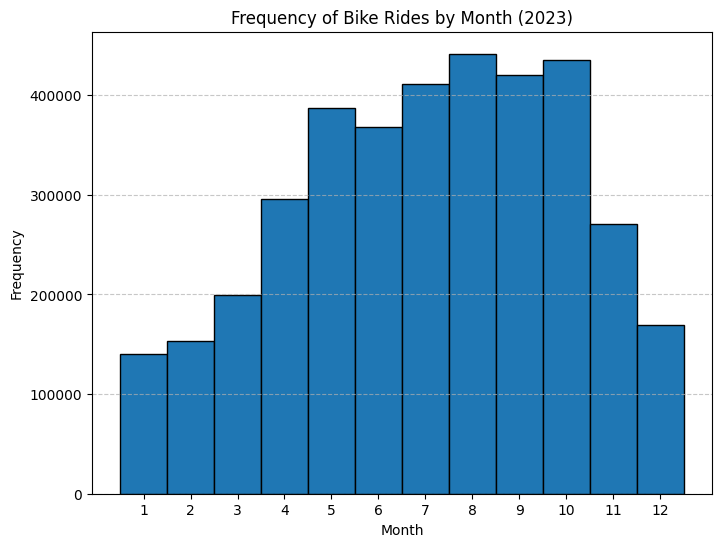

In [9]:
# Create a histogram of the 'month' column
plt.figure(figsize=(8, 6))
plt.hist(bluebikes23['month'], bins=range(bluebikes23['month'].min(), bluebikes23['month'].max() + 2), edgecolor='black', align='left')
plt.title('Frequency of Bike Rides by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(bluebikes23['month'].min(), bluebikes23['month'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

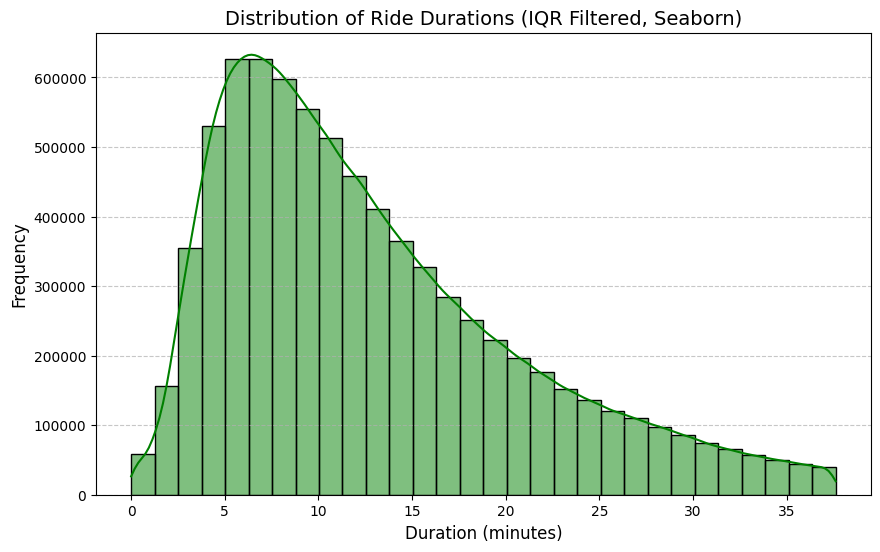

In [10]:
# Calculate IQR
Q1 = bluebikes['duration_min'].quantile(0.25)
Q3 = bluebikes['duration_min'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for filtering
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to exclude outliers
filtered_data = bluebikes[(bluebikes['duration_min'] >= lower_bound) & (bluebikes['duration_min'] <= upper_bound)]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['duration_min'], bins=30, kde=True, color='green')
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Ride Durations (IQR Filtered, Seaborn)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#correlation_matrix_float = bikes_float.corr()
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix_float, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
#plt.title('Correlation Matrix')
#plt.show()

In [ ]:
#correlation_matrix_group = grouped_bikes.corr()
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix_group, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
#plt.title('Correlation Matrix')
#plt.show()

In [ ]:
# Filter data for each rideable type
#classic_bike_data = filtered_data[filtered_data['rideable_type'] == 'classic_bike']
#electric_bike_data = filtered_data[filtered_data['rideable_type'] == 'electric_bike']

# Plot for classic_bike
##plt.figure(figsize=(10, 6))
#sns.histplot(classic_bike_data['duration_min'], bins=30, kde=True, color='blue')
#plt.xlabel('Duration (minutes)', fontsize=12)
#plt.ylabel('Frequency', fontsize=12)
#plt.title('Distribution of Ride Durations (Classic Bike)', fontsize=14)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()

In [ ]:
# Plot for electric_bike
#plt.figure(figsize=(10, 6))
#sns.histplot(electric_bike_data['duration_min'], bins=30, kde=True, color='green')
#plt.xlabel('Duration (minutes)', fontsize=12)
#plt.ylabel('Frequency', fontsize=12)
#plt.title('Distribution of Ride Durations (Electric Bike)', fontsize=14)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()

<ipython-input-11-b9c8da9f7012>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['total_seconds'] = filtered_data['time'].apply(time_to_seconds)
<ipython-input-11-b9c8da9f7012>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['time_of_day'] = pd.cut(filtered_data['total_seconds'], bins=time_bins, labels=time_labels, right=False)
<ipython-input-11-b9c8da9f7012>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

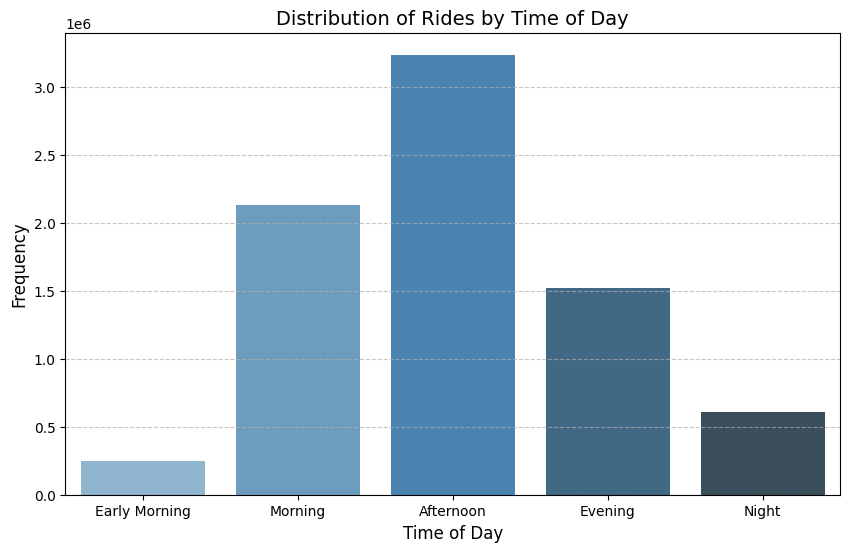

In [11]:
from datetime import datetime

# Convert time strings to total seconds since midnight
def time_to_seconds(t):
    parsed_time = datetime.strptime(t, "%H:%M:%S")
    return parsed_time.hour * 3600 + parsed_time.minute * 60 + parsed_time.second

# Add a 'total_seconds' column to the dataframe
filtered_data['total_seconds'] = filtered_data['time'].apply(time_to_seconds)

# Define bins for times of the day (in seconds since midnight)
time_labels = ["Early Morning", "Morning", "Afternoon", "Evening", "Night"]
time_bins = [0, 6 * 3600, 12 * 3600, 18 * 3600, 21 * 3600, 24 * 3600]  # [Midnight, 6AM, Noon, 6PM, 9PM, Midnight]

# Categorize times based on bins
filtered_data['time_of_day'] = pd.cut(filtered_data['total_seconds'], bins=time_bins, labels=time_labels, right=False)

# Count occurrences in each category
time_counts = filtered_data['time_of_day'].value_counts().reindex(time_labels)

# Plot the histogram using labeled categories
plt.figure(figsize=(10, 6))
sns.barplot(x=time_counts.index, y=time_counts.values, palette="Blues_d")
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Rides by Time of Day', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Sample the data (1% sample from the original dataset)
sample_size = int(0.01 * 8254372)  # 1% of the data
data_sample = filtered_data.sample(n=sample_size, random_state=42)

# Ensure there is no missing value in the relevant columns
data_sample = data_sample.dropna(subset=['start_lat', 'start_lng', 'duration_min', 'end_lat', 'end_lng'])

In [13]:
grouped_bikes = data_sample.groupby(['start_lat', 'start_lng', 'end_lat', 'end_lng', 'year', 'month', 'day', 'duration_min', 'total_seconds']).size().reset_index(name='Count')
bikes_float = data_sample[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'year', 'month', 'day', 'duration_min', 'total_seconds']]

In [15]:
grouped_correlation = grouped_bikes.corr()
formatted_corr_matrix = grouped_correlation.round(2)

print("Formatted Correlation Matrix:")
print(formatted_corr_matrix)


Formatted Correlation Matrix:
               start_lat  start_lng  end_lat  end_lng  year  month   day  \
start_lat           1.00      -0.00     0.74     0.02 -0.02  -0.01  0.01   
start_lng          -0.00       1.00     0.03     0.71  0.01   0.01  0.00   
end_lat             0.74       0.03     1.00    -0.01 -0.02  -0.01  0.00   
end_lng             0.02       0.71    -0.01     1.00  0.00   0.01  0.00   
year               -0.02       0.01    -0.02     0.00  1.00  -0.02  0.01   
month              -0.01       0.01    -0.01     0.01 -0.02   1.00 -0.07   
day                 0.01       0.00     0.00     0.00  0.01  -0.07  1.00   
duration_min       -0.00      -0.02    -0.01    -0.02 -0.04   0.02  0.01   
total_seconds       0.01      -0.00     0.02    -0.06  0.00  -0.01  0.00   
Count                NaN        NaN      NaN      NaN   NaN    NaN   NaN   

               duration_min  total_seconds  Count  
start_lat             -0.00           0.01    NaN  
start_lng             -0.02  

Training and Testing Metrics (MSE, R², MAE)

Linear Regression Model:
Linear Regression - MSE: 63.047739982810455, R²: 0.0006597396653048593, MAE: 6.356426623166054
Linear Regression - MSE: 63.890715077402994, R²: 0.0006297195969162672, MAE: 6.409626536447226

K-Nearest Neighbors Model:
K-NN - MSE: 22.154397713116616, R²: 0.6488409959782762, MAE: 3.1573896592659945
K-NN - MSE: 32.691284581708466, R²: 0.4886471657176046, MAE: 3.8390343698854337

SVM Model:

Random Forest Model:
Random Forest - MSE: 11.671705360075103, R²: 0.8149972532517831, MAE: 2.126512463842188
Random Forest - MSE: 33.082604578869784, R²: 0.482526189065259, MAE: 3.8387243866876544


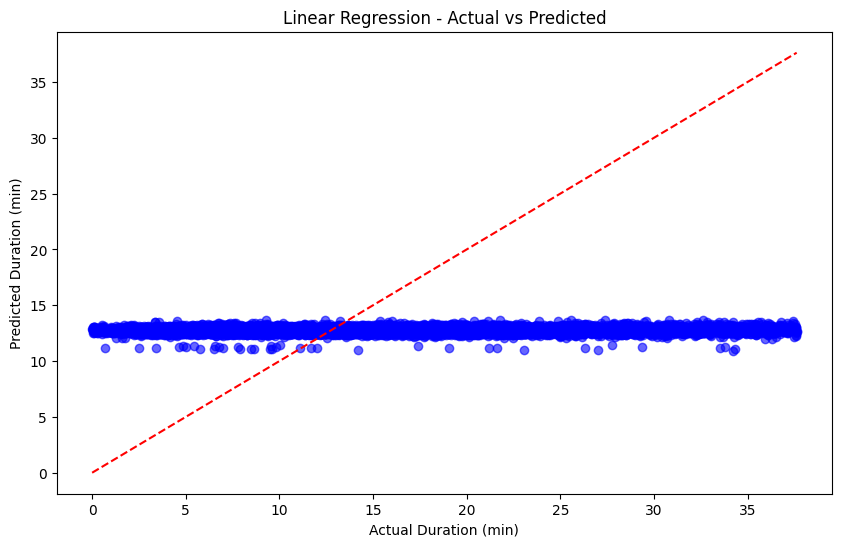

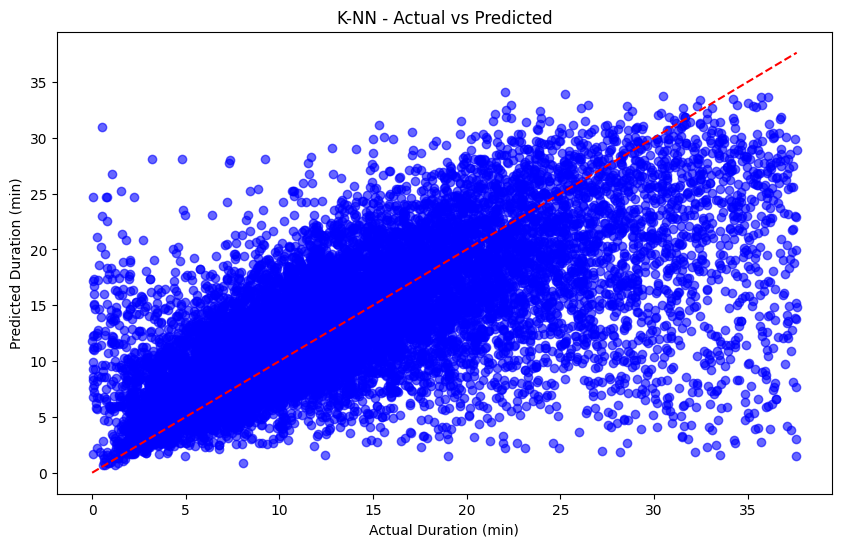

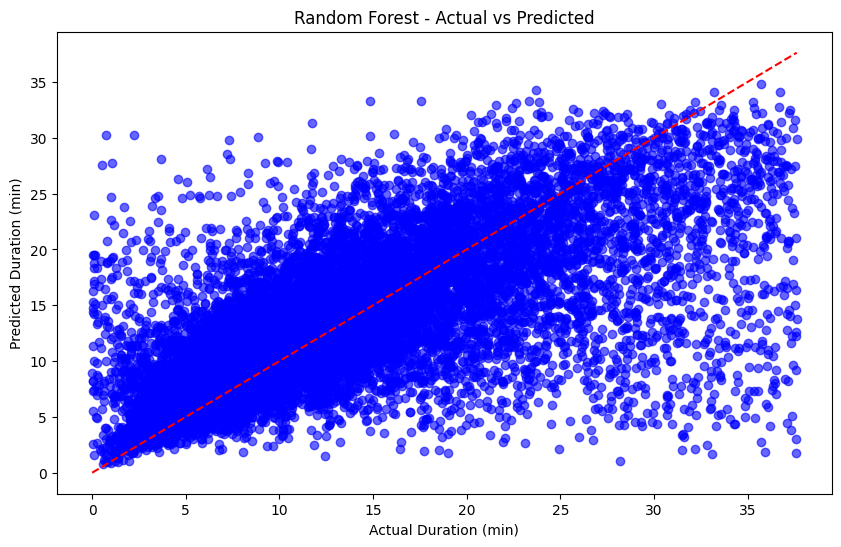

In [16]:
#remove na rows
data_sample = data_sample.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'])

# Features (start_lat, start_lng) and target (duration_min)
X = data_sample[['start_lat', 'start_lng', 'end_lat', 'end_lng']]
y = data_sample['duration_min']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Linear Regression Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

# 2. K-Nearest Neighbors (k-NN) Model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

# 3. Support Vector Machine (SVM) Model
#svm_regressor = SVR(kernel='rbf')
#svm_regressor.fit(X_train_scaled, y_train)

# 4. Random Forest Model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Predictions on both training and testing sets for each model
y_train_preds_linear = linear_regressor.predict(X_train_scaled)
y_test_preds_linear = linear_regressor.predict(X_test_scaled)

y_train_preds_knn = knn_regressor.predict(X_train_scaled)
y_test_preds_knn = knn_regressor.predict(X_test_scaled)

#y_train_preds_svm = svm_regressor.predict(X_train_scaled)
#y_test_preds_svm = svm_regressor.predict(X_test_scaled)

y_train_preds_rf = rf_regressor.predict(X_train_scaled)
y_test_preds_rf = rf_regressor.predict(X_test_scaled)

# Evaluate the models
def evaluate_model(y_true, y_preds, model_name):
    mse = mean_squared_error(y_true, y_preds)
    r2 = r2_score(y_true, y_preds)
    mae = mean_absolute_error(y_true, y_preds)
    print(f"{model_name} - MSE: {mse}, R²: {r2}, MAE: {mae}")
    return mse, r2, mae

# Evaluation for each model
print("Training and Testing Metrics (MSE, R², MAE)")

print("\nLinear Regression Model:")
train_mse, train_r2, train_mae = evaluate_model(y_train, y_train_preds_linear, "Linear Regression")
test_mse, test_r2, test_mae = evaluate_model(y_test, y_test_preds_linear, "Linear Regression")

print("\nK-Nearest Neighbors Model:")
train_mse, train_r2, train_mae = evaluate_model(y_train, y_train_preds_knn, "K-NN")
test_mse, test_r2, test_mae = evaluate_model(y_test, y_test_preds_knn, "K-NN")

print("\nSVM Model:")
#train_mse, train_r2, train_mae = evaluate_model(y_train, y_train_preds_svm, "SVM")
#test_mse, test_r2, test_mae = evaluate_model(y_test, y_test_preds_svm, "SVM")

print("\nRandom Forest Model:")
train_mse, train_r2, train_mae = evaluate_model(y_train, y_train_preds_rf, "Random Forest")
test_mse, test_r2, test_mae = evaluate_model(y_test, y_test_preds_rf, "Random Forest")

# Plotting Actual vs Predicted for each model
def plot_actual_vs_predicted(y_actual, y_predicted, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_predicted, color='blue', alpha=0.6)
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('Actual Duration (min)')
    plt.ylabel('Predicted Duration (min)')
    plt.show()

# Plot Actual vs Predicted for each model on the test set
plot_actual_vs_predicted(y_test, y_test_preds_linear, "Linear Regression")
plot_actual_vs_predicted(y_test, y_test_preds_knn, "K-NN")
#plot_actual_vs_predicted(y_test, y_test_preds_svm, "SVM")
plot_actual_vs_predicted(y_test, y_test_preds_rf, "Random Forest")
